<a href="https://colab.research.google.com/github/RFatih/Twitter_Twint_Analye-Visualize_Word_Frequencies/blob/main/Twtint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/twintproject/twint.git

In [ ]:
%cd twint/
!ls

In [ ]:
!pip3 install . -r requirements.txt

In [ ]:
!pip3 install --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [ ]:
import twint
import nest_asyncio
nest_asyncio.apply()
config = twint.Config()
config.Username = "evrimagaci"
config.Limit = 3200
#config.Year = "2021"
config.Store_csv = True
config.Output = "ea2021.csv"
twint.run.Search(config)

/content/twint
                    id      conversation_id  ... trans_src trans_dest
0  1344766034629296128  1344766034629296128  ...       NaN        NaN
1  1344750229720080386  1344750229720080386  ...       NaN        NaN
2  1344735835120427011  1344735835120427011  ...       NaN        NaN
3  1344720735542116353  1344720735542116353  ...       NaN        NaN
4  1344705636915961857  1344705636915961857  ...       NaN        NaN

[5 rows x 36 columns]
id
conversation_id
created_at
date
time
timezone
user_id
username
name
place
tweet
language
mentions
urls
photos
replies_count
retweets_count
likes_count
hashtags
cashtags
link
retweet
quote_url
video
thumbnail
near
geo
source
user_rt_id
user_rt
retweet_id
reply_to
retweet_date
translate
trans_src
trans_dest
                                               tweet
0  Eğer Bakteriler Ölümsüz Olsaydı, 40 Saat İçind...
1  10... 9... 8... 7... 6... 5... 4... 3.. 2... 1...
2  Sürekli Genital Uyarılma Bozukluğu: Günde 100'...
3  Beynimizin Kapasi

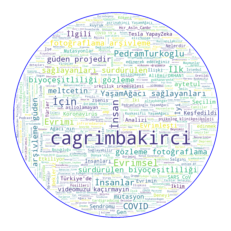

In [ ]:
%cd /content/twint/
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


def transform_format(val):
    if val == 0:
        return 255
    else:
        return val


df = pd.read_csv("/content/twint/ea2020.csv", error_bad_lines=False)
sw =pd.read_csv("/content/twint/stopw.csv", error_bad_lines=False)
print(df.head())
for col in df.columns:
  print(col)
df.drop(df.columns.difference(['tweet']), 1, inplace=True)
print(df.head())

text = ""

for a in df.tweet:
  text+=a
#text = text.lower()
stopwords = set(STOPWORDS)
stopwords.update(["of", "in","the","https","co","bir","bu","da","daha","ve","ile","de","en","var","yok","ne","gibi","mi","ya"])
for data in sw.bir:
  stopwords.update([data])

print(stopwords)
deu_mask = np.array(Image.open("/content/twint/deu.png"))
transformed_deu_mask = np.ndarray((deu_mask.shape[0],deu_mask.shape[1]), np.int32)

for i in range(len(deu_mask)):
    transformed_deu_mask[i] = list(map(transform_format, deu_mask[i]))



tuples = [tuple(x) for x in df.values]

wordcloud = WordCloud(stopwords=stopwords,mask=transformed_deu_mask, max_words=1000, background_color="white",contour_width=3, contour_color='blue').generate(text)

wordcloud.to_file("/content/twint/deu_output.png")

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
%cd /content/trstop/dosyalar/


/content
Cloning into 'trstop'...
remote: Enumerating objects: 69, done.
remote: Total 69 (delta 0), reused 0 (delta 0), pack-reused 69
Unpacking objects: 100% (69/69), done.


In [ ]:
!git clone https://github.com/amueller/word_cloud.git
%cd word_cloud
!pip install .

Cloning into 'word_cloud'...
remote: Enumerating objects: 6459, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 6459 (delta 8), reused 15 (delta 7), pack-reused 6441
Receiving objects: 100% (6459/6459), 116.92 MiB | 25.64 MiB/s, done.
Resolving deltas: 100% (3839/3839), done.
/content/twint/word_cloud
Processing /content/twint/word_cloud
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for wordcloud: filename=wordcloud-1.8.1.post3+g0b3b942-cp37-cp37m-linux_x86_64.whl size=333115 sha256=31b764c76406c57e02d3c796e7a9b976d3c4c9212f6c7608c7a6000def7778f0
  Stored in di

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cp /content/drive/MyDrive/stopw.csv /content/twint/